In [323]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [303]:
# Load the dataset
data = load_breast_cancer()

# Convert to DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target  # Add target column

# Display first 3 rows
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [304]:
x_train, x_test, y_train, y_test = train_test_split(df.drop("target", axis=1), df["target"], test_size=0.2, random_state=42)

In [305]:
print(f'x_train shape : {x_train.shape}')
print(f'x_test shape : {x_test.shape}')

x_train shape : (455, 30)
x_test shape : (114, 30)


In [306]:
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [307]:
x_train_tensor = torch.from_numpy(X_train).float()
x_test_tensor = torch.from_numpy(X_test).float()
y_train_tensor = torch.from_numpy(y_train.values).float().reshape(-1, 1)
y_test_tensor = torch.from_numpy(y_test.values).float().reshape(-1, 1)

In [308]:
x_train_tensor.shape

torch.Size([455, 30])

In [309]:
x_train_tensor.dtype

torch.float32

In [310]:
y_test.dtype

dtype('int64')

In [311]:
y_train_tensor.shape

torch.Size([455, 1])

In [312]:
# Forward pass function
def fwd(X, w, b):
    z = torch.matmul(X, w) + b
    y_pred = torch.sigmoid(z)
    return y_pred

# Loss function
def loss_function(y_pred, y):
    epsilon = 1e-7
    y_pred = torch.clamp(y_pred, epsilon, 1 - epsilon)
    loss = -(y * torch.log(y_pred) + (1 - y) * torch.log(1 - y_pred)).mean()
    return loss

In [333]:
torch.manual_seed(123)

w = torch.rand(x_train_tensor.shape[1], 1, dtype=torch.float32, requires_grad=True)
b = torch.zeros(1, dtype=torch.float32, requires_grad=True)

# Hyperparameters
lr = 0.1
epochs = 25
loss_arr = []

In [334]:
for i in range(epochs):
    y_pred = fwd(x_train_tensor, w, b)
    loss = loss_function(y_pred, y_train_tensor)

    loss_arr.append(loss.item())

    # Backpropagation
    loss.backward()

    with torch.no_grad():
        w -= lr * w.grad
        b -= lr * b.grad

    w.grad.zero_()
    b.grad.zero_()

    print(f'Epoch {i+1}, Loss: {loss:.6f}')

Epoch 1, Loss: 6.485367
Epoch 2, Loss: 5.893921
Epoch 3, Loss: 5.277516
Epoch 4, Loss: 4.613984
Epoch 5, Loss: 3.936702
Epoch 6, Loss: 3.217581
Epoch 7, Loss: 2.527765
Epoch 8, Loss: 1.906361
Epoch 9, Loss: 1.389548
Epoch 10, Loss: 1.006691
Epoch 11, Loss: 0.756973
Epoch 12, Loss: 0.600818
Epoch 13, Loss: 0.500212
Epoch 14, Loss: 0.432014
Epoch 15, Loss: 0.383634
Epoch 16, Loss: 0.347950
Epoch 17, Loss: 0.320731
Epoch 18, Loss: 0.299364
Epoch 19, Loss: 0.282178
Epoch 20, Loss: 0.268058
Epoch 21, Loss: 0.256240
Epoch 22, Loss: 0.246185
Epoch 23, Loss: 0.237502
Epoch 24, Loss: 0.229904
Epoch 25, Loss: 0.223179


In [335]:
b

tensor([0.2849], requires_grad=True)

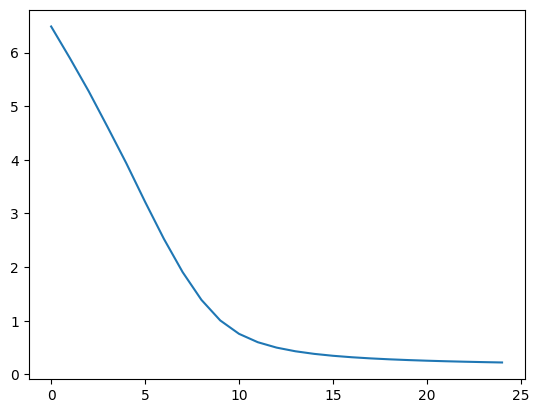

In [336]:
plt.plot(loss_arr)

In [337]:
with torch.no_grad():
  y_pred = fwd(x_test_tensor,w,b)
  y_pred = (y_pred > 0.9).float()
  accuracy = (y_pred == y_test_tensor).float().mean()
  print(f'Accuracy: {accuracy.item()}')

Accuracy: 0.6578947305679321
